
# Logistic Regression on Titanic Dataset

## 1. Data Exploration

### a. Load the dataset and perform exploratory data analysis (EDA).
We will start by loading the dataset and performing basic exploratory data analysis to understand its structure, types of features, and summary statistics.

### b. Examine the features, their types, and summary statistics.
The Titanic dataset consists of numerical and categorical features, such as **Pclass**, **Sex**, **Age**, **Fare**, and the target variable **Survived**.

### c. Visualizations
We will create visualizations such as histograms, box plots, and pair plots to better understand the distributions and relationships between the features.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<Figure size 1000x600 with 0 Axes>

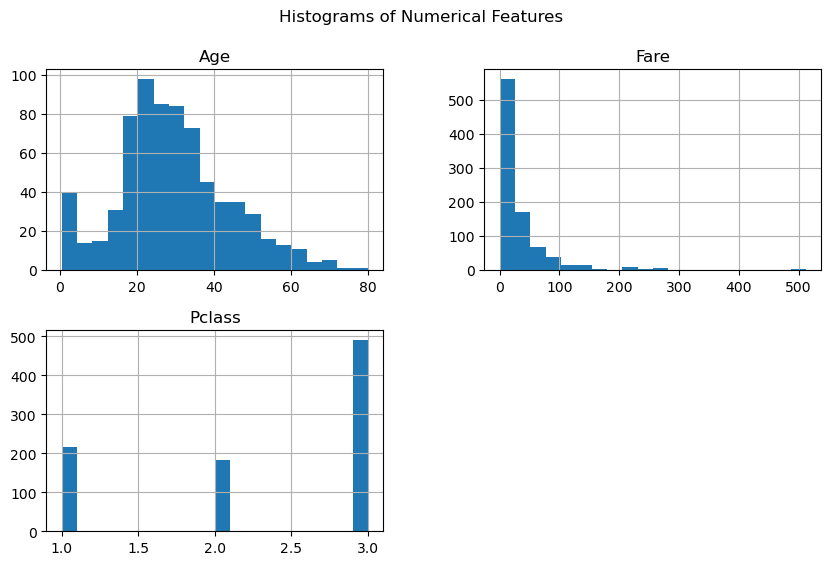

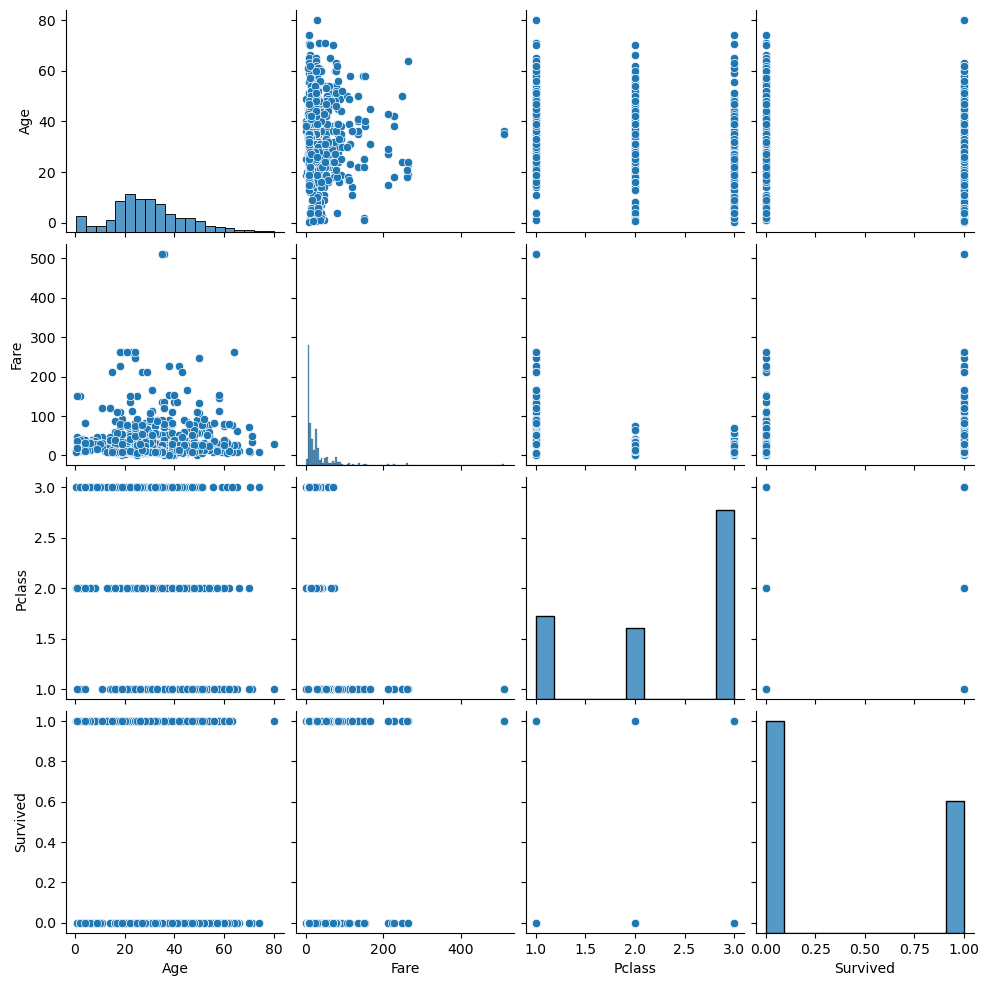

In [1]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Titanic dataset
train_file_path = 'Titanic_train.csv'
train_df = pd.read_csv(train_file_path)

# Data info and summary statistics
train_df.info(), train_df.describe(), train_df.head()

# Visualizing the distribution of numerical features
plt.figure(figsize=(10, 6))
train_df[['Age', 'Fare', 'Pclass']].hist(bins=20, figsize=(10, 6))
plt.suptitle('Histograms of Numerical Features')
plt.show()

# Visualizing pairwise relationships
sns.pairplot(train_df[['Age', 'Fare', 'Pclass', 'Survived']])
plt.show()



## 2. Data Preprocessing

### a. Handle missing values
In this step, we will handle the missing values in the dataset. For instance, the **Age** and **Embarked** columns have missing values, and we will fill them appropriately.

### b. Encode categorical variables
We will also encode categorical variables like **Sex** and **Embarked** to be used in the model.

### c. Dropping irrelevant columns
Columns like **PassengerId**, **Name**, and **Ticket** are not necessary for the model, so we will drop them.


In [2]:

# Handling missing values
train_df['Age'].fillna(train_df['Age'].median(), inplace=True)
train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True)

# Dropping the 'Cabin' column due to too many missing values
train_df.drop(columns=['Cabin'], inplace=True)

# Encoding categorical variables
train_df = pd.get_dummies(train_df, columns=['Sex', 'Embarked'], drop_first=True)

# Dropping irrelevant columns like 'PassengerId', 'Name', and 'Ticket'
train_df.drop(columns=['PassengerId', 'Name', 'Ticket'], inplace=True)

# Display the processed data
train_df.head()


,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1



## 3. Model Building

### a. Build a logistic regression model
We will now build a logistic regression model using scikit-learn. The target variable is **Survived**.


In [3]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Splitting the data into features (X) and target (y)
X = train_df.drop(columns=['Survived'])
y = train_df['Survived']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the logistic regression model
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)


LogisticRegression(max_iter=1000)


## 4. Model Evaluation

### a. Evaluate the model
We will evaluate the performance of the logistic regression model using metrics such as **accuracy**, **precision**, **recall**, **F1-score**, and **ROC-AUC**. We will also visualize the **ROC curve** and **Confusion Matrix**.


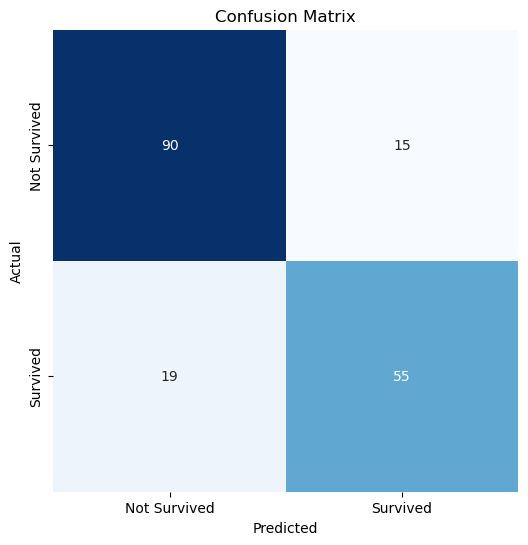

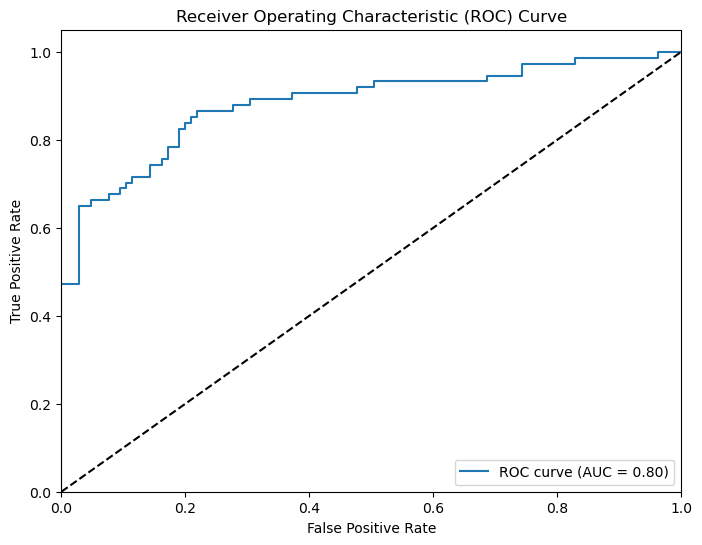

(0.8100558659217877,
 0.7857142857142857,
 0.7432432432432432,
 0.7638888888888888,
 0.8001930501930502)

In [4]:

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve

# Predict on the test set
y_pred = logreg.predict(X_test)

# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# ROC curve values
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:, 1])

# Plotting the confusion matrix
plt.figure(figsize=(6,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Not Survived', 'Survived'], 
            yticklabels=['Not Survived', 'Survived'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Plotting the ROC curve
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line (random guessing)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Display the evaluation metrics
accuracy, precision, recall, f1, roc_auc



## 5. Interpretation of Coefficients

### a. Interpret the coefficients of the logistic regression model
Each coefficient in the logistic regression model represents the impact of a feature on the probability of survival. A positive coefficient indicates that an increase in that feature increases the likelihood of survival, while a negative coefficient indicates the opposite.

For instance, a positive coefficient for **Fare** suggests that passengers who paid a higher fare had a higher chance of survival.

### b. Discuss the significance of features
By examining the magnitude of the coefficients, we can identify which features have the most significant impact on survival. For example, **Sex_female** is likely to have a strong positive impact, as women had a higher chance of survival on the Titanic.
